# **Solución del Parcial 1**

**Asignatura:** Aprendizaje de máquina y Análisis de datos

**Integrantes:**

1.   Willian Chapid Tobar / will1an@javerianacali.edu.co
2.   Daniel Andres Vasquez / danielvasquez2004@javerianacali.edu.co
3.   Miguel Angel Nivia Ortega / miguelnivia19@javerianacali.edu.co

**Fecha:** 18/03/2024




In [ ]:
# Librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap
from google.colab import files
from sklearn.metrics import confusion_matrix

CARGA DE DATOS DE LOS BILLETES

In [ ]:
# Cargar la base de datos
uploaded = files.upload()
data = pd.read_csv("data_parcial.csv")

In [ ]:
# Datos
data.info()
print()
data.describe()
print()
print(data)
print("Columnas:", data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


      variance  skewness  curtosis  entropy  class
0      3.62160   8.66610   -2.8073 -0.44699      0
1      4.54590   8.16740   -2.4586 -1.46210      0
2      3.86600  -2.63830    1.9242  0.10645      0
3      3.45660   9.52280   -4.0112 -3.59440      0
4      0.32924  -4.45520    4.5718 -0.98880      0
...        ...       ...       ...      ...    ...
1367   0.40614   1.34920   -1.4501 -0.55949      1
1368  -1.38870  -4.87730    6.4774  0.34179      1
1369  -3.75030 -13.45860   17.5932 -2.77710      1
1370  -3.56370  -8.38270   12.3930 -1.28230      1
1371  -

In [ ]:
data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [ ]:
# Algunas variables
data.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


# EDA

In [ ]:
# Verificacion de que exista datos nulos
nulos = data.isnull().sum()
print(nulos)

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64


Al observar como no hay datos nulos, entonces, no va a afectar en los calculos de los datos, graficas y medias, por ende se puede proceder con esto.

In [ ]:
# Verificacion de que exista valores/registros duplicados en el df
duplicados = data.duplicated()  # Se verifica que no haya registros(filas) duplicadas
existeDuplicados = duplicados.any() # Se verifica si hay algun True de duplicados que inidica que si existe al menos 1 registro duplicado.

if existeDuplicados:
    print("El dataset tiene registros duplicados.")
    conteo = data[duplicados].shape[0]
    print(f"Número de registros duplicados: {conteo}")  # Se devuelve el numero de registros duplicados
else:
    print("El dataset no tiene registros duplicados.")

El dataset tiene registros duplicados.
Número de registros duplicados: 24


Al observarse con esto, hay datos/registros duplicados por lo cual, no tiene sentido, ya que los billetes geniunos son cada uno totalmente unicos, pero falsificados si puede existir, pero esto puede generar un mayor peso y daño a los datos para el entrenamiento del perceptron y el adaline, por lo cual se concluye que se eliminara estos datos y se procedera sin ellos.

In [ ]:
data2 = data.drop_duplicates()

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1348 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1348 non-null   float64
 1   skewness  1348 non-null   float64
 2   curtosis  1348 non-null   float64
 3   entropy   1348 non-null   float64
 4   class     1348 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 63.2 KB


Ahora se trabajara con este dataframe modificado

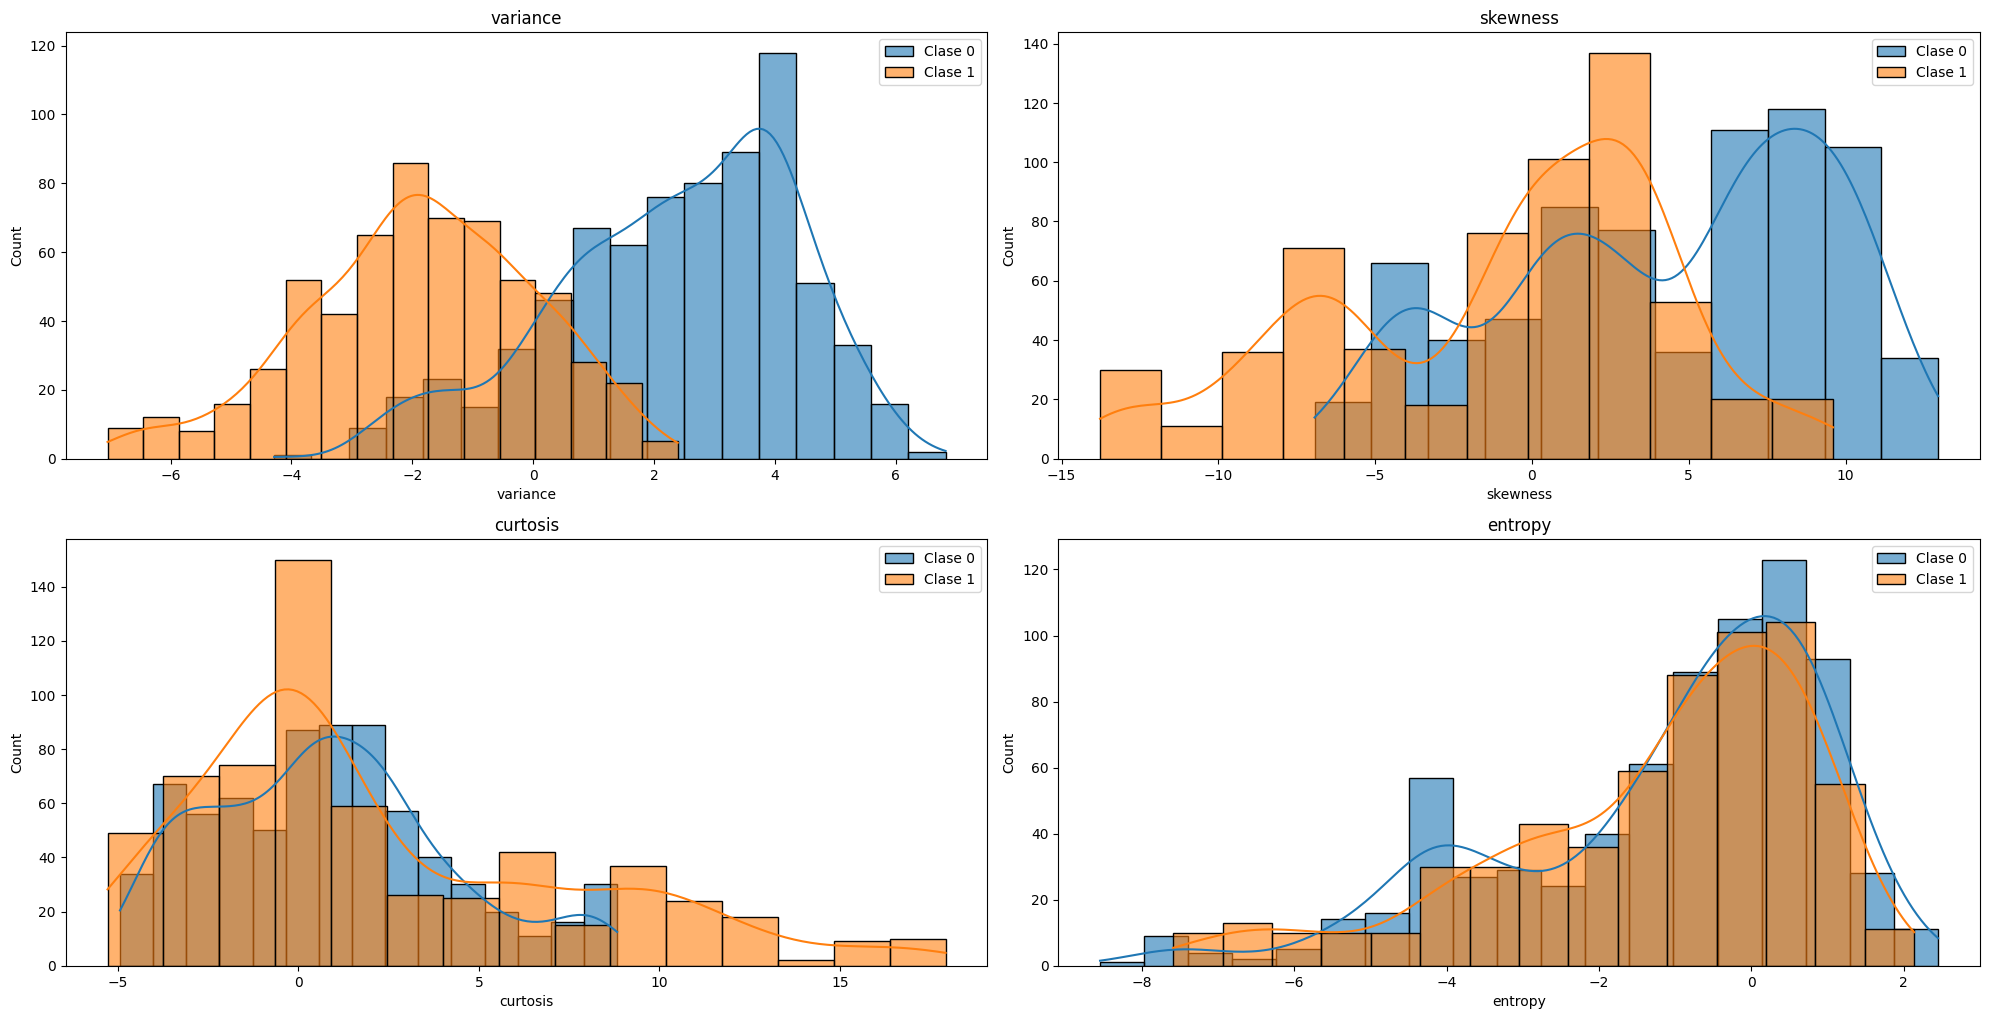

In [ ]:
# Histograma de caracteristicas

# Agrupar por la clase
gruposClase = data2.groupby('class')

# Obtener las características (columnas) del conjunto de datos
caracteristicas = data2.columns[:-1]  # Excluir la columna de clase (target)

# Definir el tamaño del gráfico y el número de filas y columnas
plt.figure(figsize = (20, 20))
num_filas = 4
num_columnas = 2
for i, caracteristica in enumerate(caracteristicas):  # Iterar sobre cada característica y trazar un histograma para cada clase
    plt.subplot(num_filas, num_columnas, i + 1)
    for clase, grupo in gruposClase:
        sns.histplot(grupo[caracteristica], kde=True, label=f'Clase {clase}', alpha=0.6)
    plt.title(caracteristica)
    plt.legend()

plt.tight_layout()
plt.show()

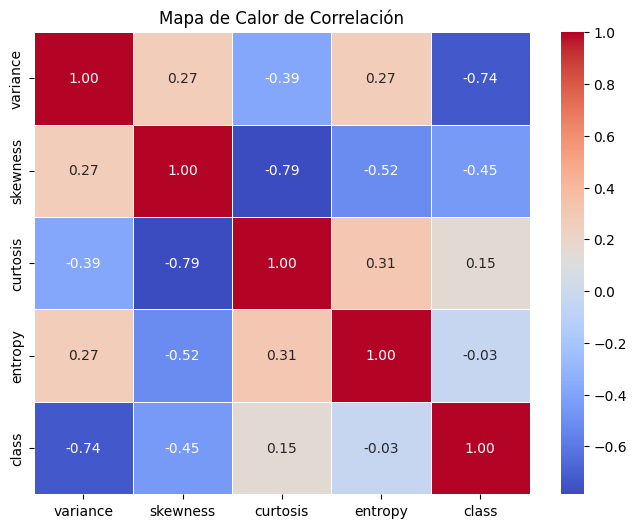

In [ ]:
# Grafica De Calor - Corelacion

# Calcular la matriz de correlación
matrizCorrelacion = data2.corr()

# Mapa de calor
plt.figure(figsize = (8, 6))
sns.heatmap(matrizCorrelacion, annot = True, cmap = "coolwarm", fmt = ".2f", linewidths = 0.5)
plt.title("Mapa de Calor de Correlación")
plt.show()

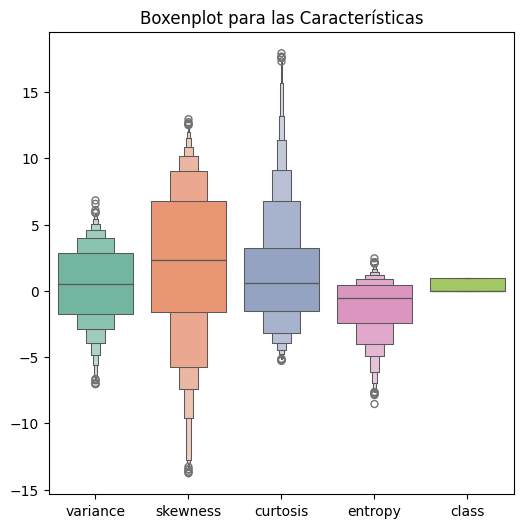

In [ ]:
# Grafica Boxenplot

# Boxenplot para cada característica
plt.figure(figsize = (6, 6))
sns.boxenplot(data = data2, palette = "Set2")
plt.title("Boxenplot para las Características")
plt.show()

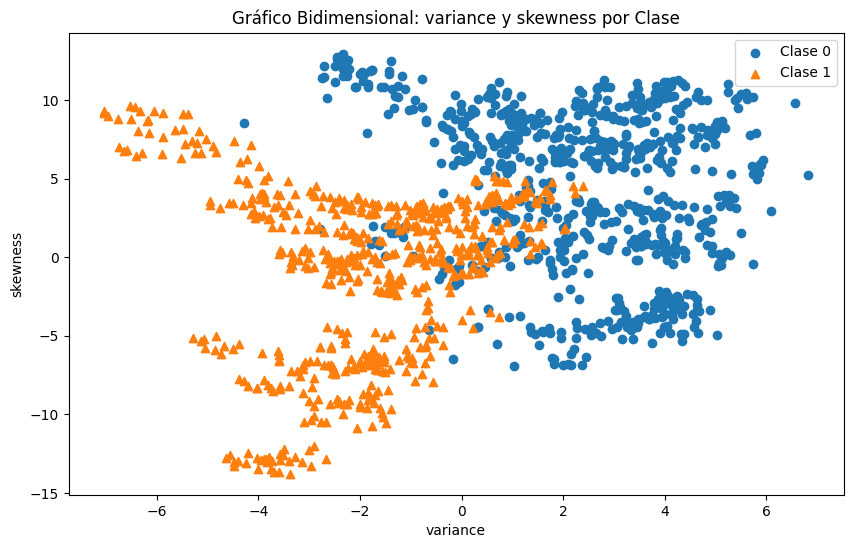

In [ ]:
# Filtrar datos para cada clase
clase0 = data2[data2['class'] == 0]
clase1 = data2[data2['class'] == 1]

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

# Graficar Clase 0
ax.scatter(clase0['variance'], clase0['skewness'], label='Clase 0', marker='o')

# Graficar Clase 1
ax.scatter(clase1['variance'], clase1['skewness'], label='Clase 1', marker='^')

# ejes
ax.set_xlabel('variance')
ax.set_ylabel('skewness')
ax.set_title('Gráfico Bidimensional: variance y skewness por Clase')
ax.legend()
plt.show()

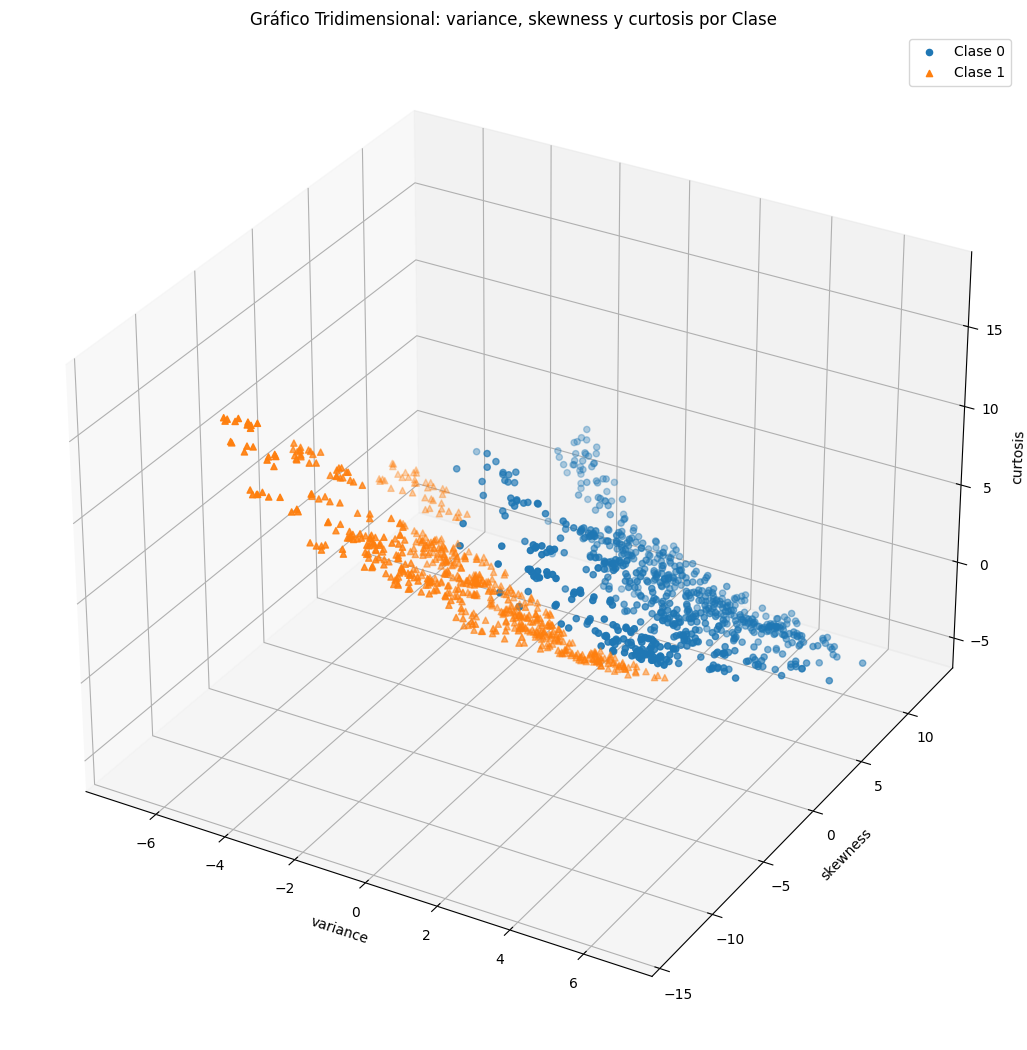

In [ ]:
# Grafica Tridimensional

# Filtrar datos para cada clase
clase0 = data2[data2['class'] == 0]
clase1 = data2[data2['class'] == 1]

fig = plt.figure(figsize = (13, 18))
ax = fig.add_subplot(111, projection = '3d')

# Graficar Clase 0
ax.scatter(clase0['variance'], clase0['skewness'], clase0['curtosis'], label = 'Clase 0', marker = 'o')

# Graficar Clase 1
ax.scatter(clase1['variance'], clase1['skewness'], clase1['curtosis'], label = 'Clase 1', marker = '^')

# ejes
ax.set_xlabel('variance')
ax.set_ylabel('skewness')
ax.set_zlabel('curtosis')

ax.set_title('Gráfico Tridimensional: variance, skewness y curtosis por Clase')
ax.legend()
plt.show()

In [ ]:
# Grafica Tridimensional interactiva
import plotly.graph_objs as go
import plotly.io as pio

# Filtrar datos para cada clase
clase0 = data2[data2['class'] == 0]
clase1 = data2[data2['class'] == 1]

# Crear trazos de dispersión para cada clase
trace0 = go.Scatter3d(
    x=clase0['variance'],
    y=clase0['skewness'],
    z=clase0['curtosis'],
    mode='markers',
    name='Clase 0',
    marker=dict(
        size=4,
        color='blue',
        opacity=0.8
    )
)

trace1 = go.Scatter3d(
    x=clase1['variance'],
    y=clase1['skewness'],
    z=clase1['curtosis'],
    mode='markers',
    name='Clase 1',
    marker=dict(
        size=4,
        color='red',
        opacity=0.8
    )
)

# Crear el layout
layout = go.Layout(
    title='Gráfico Tridimensional: variance, skewness y curtosis por Clase',
    scene=dict(
        xaxis=dict(title='Variance'),
        yaxis=dict(title='Skewness'),
        zaxis=dict(title='Curtosis')
    )
)

# Crear la figura
fig = go.Figure(data=[trace0, trace1], layout=layout)

# Visualizar la figura interactiva
pio.show(fig)


En base a todo lo anterior, referente a la graficas de las caracteristicas y el grafico de mapa de calor, nos damos cuenta que los mejores datos con mayor relacion aparentemente son variance con skewness y detras de ellos viene curtosis, mientras que entropy es totalmente erroneo puesto que no tiene buena correlacion y tambien tiene los datos de las 2 clases en formato de gauss una encima de otra indicando que los datos son irreconocibles entre ellos.

# Valores de "X" y "Y"

In [ ]:
# Organizar datos para obtencion de X: Se escogio el variance y el skewness, los cuales se eligieron porque tienen un class
# bastante similar y cercano a 1 siendo indicativo de que puede ser buena pareja.

# X = dataCancer[['worst area', 'worst perimeter']].values
X = data2[['variance', 'skewness']].values
print(X.shape)
print(X)

(1348, 2)
[[  3.6216    8.6661 ]
 [  4.5459    8.1674 ]
 [  3.866    -2.6383 ]
 ...
 [ -3.7503  -13.4586 ]
 [ -3.5637   -8.3827 ]
 [ -2.5419   -0.65804]]


In [ ]:
# Obtencion de Y (step_function)

y = [0] * len(data2)
for i, clase in enumerate(data2['class']):
    if clase == 0:  # Clase 0: Real
        y[i] = 0
    else:           # Clase 1: Falso
        y[i] = 1

y = np.array(y)
y1 = y.reshape(1, 1348)
print(y.shape)
print(y1.shape)

# Matriz Resultante
print(y)

(1348,)
(1, 1348)
[0 0 0 ... 1 1 1]


In [ ]:
# Para matriz de confusion
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state=0)

Entrenamiento del 20% para la matriz de confusion

# PERCEPTRON

In [ ]:
class Perceptron(object):
    """Clasificador Perceptron.

    Parámetros
    ------------
    |eta : float
      Tasa de aprendizaje (entre 0.0 y 1.0)
    |n_iter : int
      Número de iteraciones sobre el dataset.
    |random_state : int
      Semilla del generador de números aleatorios para la inicialización del bias y pesos aleatorios.
    |Rw: int
      (Rw; Random weights), Tipo de forma en la cual se generaran el bias y pesos aleatorios.

      Si se usa por defecto 0:

      ** Es un vector que contiene pequeños números aleatorios extraídos de una distribución normal
      con distribución normal y desviación estandar 0.01

      Si se usa 1:

      ** Valores aleatorios en el rango de -25 a +25, asegurándose de que ninguno sea igual a cero
      excepto el primer valor, que es el bias. Los valores que se hubieran generado como cero se reemplazarán
      por valores muy pequeños (0.0001) multiplicados por un factor aleatorio de -1 o 1.
    |Af: String
      (Af;Activation Function), Tipo de función de aprendizaje: step_function o bipolar_step_function.


    Atributos
    -----------
    |w_ : Arreglo 1D
      Pesos antes del entrenamiento (Iniciales).
    |errors_ : list
      Número de clasificaciones erróneas (actualizaciones) en cada época.
    |w_historical: list
      Almacena todos los valores de bias y pesos obtenidos en cada época:

      [Pesos iniciales, Pesos_iter1, Pesos_inter2,....Pesos_n_iter]

      La dimensión de la lista es: 1 x (1 + n_iter)

    """
    #FUNCIÓN PARA INICIALIZAR MI PERCEPTRON
    def __init__(self, eta=0.01, n_iter=50, Af='step_function', Rw=0 , random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        self.Rw = Rw
        self.Af = Af


    #FUNCIÓN PARA ENTRENAR MI CONJUNTO DE DATOS USANDO MI PERCEPTRON
    def fit(self, X, y):
        """Datos de entrenamiento para ajustar.

        Parameters
        ----------
        X : {Tipo matriz}, Dimensión = [n_muestras, n_características]
          Training vectors, donde n_muestras es el número de muestras y
          n_características es el número de características.
        y : Tipo vector fila, shape = [n_samples]
          Target values.

        Retorna
        -------
        self : objeto

        """
        rgen = np.random.RandomState(self.random_state)

        if(self.Rw == 0):
          self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        elif(self.Rw == 1):
          lower_bound = -25
          upper_bound = 25
          self.w_ = rgen.uniform(low=lower_bound, high=upper_bound, size=1 + X.shape[1])
          # Asegurar que ningún valor sea igual a cero, excepto el primer valor
          self.w_[1:] = np.where(self.w_[1:] == 0, np.random.choice([-1, 1], size=self.w_[1:].shape) * 0.0001, self.w_[1:])
        else:
          print("Error, solo se puede usar 0 o 1.")

        """
        Genera el vector de pesos de manera aleatoria [Un peso W1 hasta ...Wn]
        Donde n, corresponde al número de caractarísticas de que presente las
        muestras del dataset + 1 elemento adicional que es el BIAS.
        """


        """
        Incializa el vector de errores vacio, dado que lo llenará en función de
        cada iteración.
        """

        self.errors_ = []
        self.w_historical = [self.w_.copy()]  # Agrega los pesos iniciales a la lista

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
            self.w_historical.append(self.w_.copy())  # Guarda una copia de los pesos actuales en cada iteración
        return self

    def net_input(self, X):
        """Calcular la entrada NETA:"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        Activation_function = self.Af

        """Devolver el valor de predicción final (pasando por la función de activación)"""

        if(Activation_function =='step_function'):
          return np.where(self.net_input(X) >= 0.0, 1, 0)
        elif(Activation_function =='bipolar_step_function'):
          return np.where(self.net_input(X) >= 0.0, 1, -1)
        else:
          print("Error, solo puede ser 'step_function' o 'bipolar_step_function'")

In [ ]:
# Entrenamiento Perceptron

resultEntrenamientos = []
iteraciones = [20, 50, 100, 200]
valoresEta = [0.3, 0.4, 0.5, 0.6, 0.7]
modelos = []
for n_iter in iteraciones:
  for eta in valoresEta:
      # Crear una nueva instancia del perceptrón con el valor de eta actual
      ppn = Perceptron(eta = eta, n_iter = n_iter, Af = 'step_function', Rw = 0)
      # Entrenamiento
      ppn.fit(x_train, y_train)
      # Almacenar los últimos valores de convergencia
      valores = {'eta': eta, 'w1': ppn.w_[-2], 'w2': ppn.w_[-1], 'b': ppn.w_[0], 'errors': ppn.errors_[-1]}
      modelos.append(ppn)
      resultEntrenamientos.append(valores)

# Imprimir los resultados
for resultado in resultEntrenamientos:
    print(f"Tasa de aprendizaje (eta): {resultado['eta']}")
    print(f"Últimos valores de convergencia - w1: {resultado['w1']}, w2: {resultado['w2']}, b: {resultado['b']}")
    print(f"Número de errores en la última iteración: {resultado['errors']}")
    print()
ppn = modelos[0]

Tasa de aprendizaje (eta): 0.3
Últimos valores de convergencia - w1: -5.687011134136468, w2: -0.5693300175226718, b: 2.116243453636633
Número de errores en la última iteración: 171

Tasa de aprendizaje (eta): 0.4
Últimos valores de convergencia - w1: -7.580642324136511, w2: -0.7573461175226519, b: 2.8162434536366328
Número de errores en la última iteración: 171

Tasa de aprendizaje (eta): 0.5
Últimos valores de convergencia - w1: -9.474273514136575, w2: -0.945362217522589, b: 3.5162434536366325
Número de errores en la última iteración: 171

Tasa de aprendizaje (eta): 0.6
Últimos valores de convergencia - w1: -10.094836764136424, w2: -3.7819205175227095, b: 3.6162434536366326
Número de errores en la última iteración: 173

Tasa de aprendizaje (eta): 0.7
Últimos valores de convergencia - w1: -11.776289964136573, w2: -4.411360317522604, b: 4.216243453636633
Número de errores en la última iteración: 173

Tasa de aprendizaje (eta): 0.3
Últimos valores de convergencia - w1: -3.640060764136445

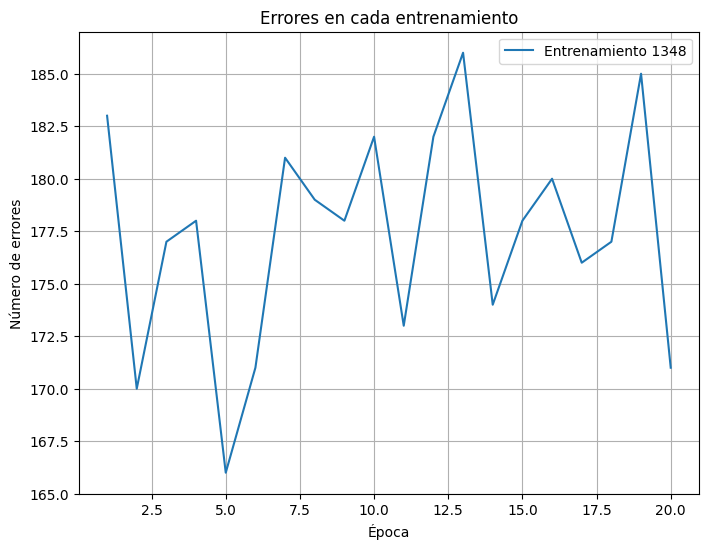

In [ ]:
# Grafica de errores

plt.figure(figsize=(8, 6))
resultado = resultEntrenamientos[0]
errors = resultado['errors']
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, label=f'Entrenamiento {i + 1}')

plt.xlabel('Época')
plt.ylabel('Número de errores')
plt.title('Errores en cada entrenamiento')
plt.legend()
plt.grid(True)
plt.show()

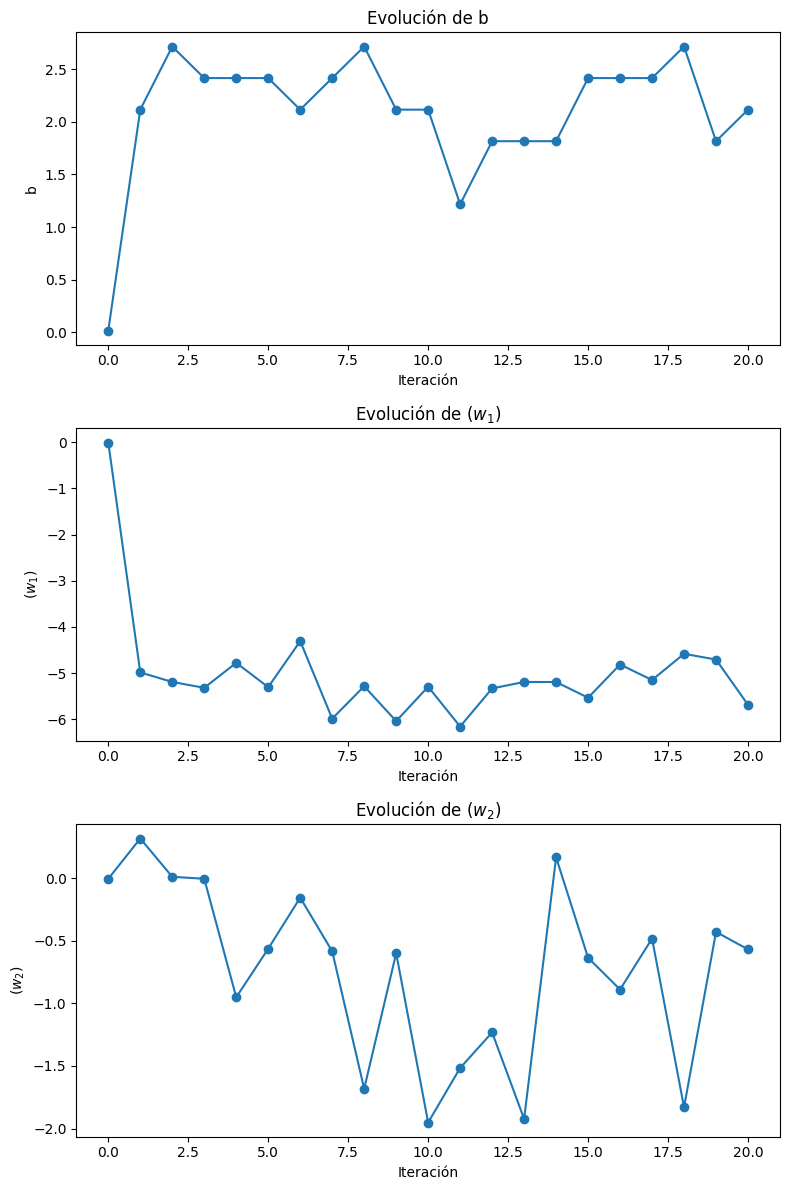

In [ ]:
# Grafico de los hiperparametros

# Lista de etiquetas para los gráficos
labels = ['b', '($w_1$)', '($w_2$)']

# Crear tres subgráficos
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# Iterar sobre cada etiqueta y crear un gráfico correspondiente
for i, label in enumerate(labels):
    # Extraer la serie temporal para la etiqueta actual
    series = [weights[i] for weights in ppn.w_historical]

    # Graficar la serie temporal
    axs[i].plot(range(len(ppn.w_historical)), series, marker='o')
    axs[i].set_title(f'Evolución de {label}')
    axs[i].set_xlabel('Iteración')
    axs[i].set_ylabel(label)

plt.tight_layout()
plt.show()

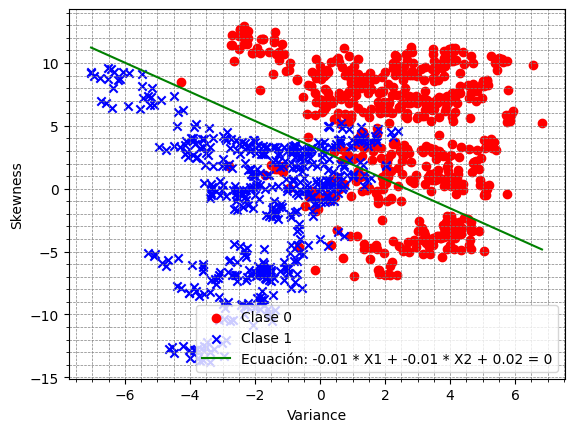

In [ ]:
# Grafica de separacion

# Creo el dataframe
grafica = pd.DataFrame(data=x_train, columns=['variance', 'skewness'])
grafica['class'] = y_train

# Divido el DataFrame en dos basado en la clase.
dfReal = grafica[grafica['class'] == 0]
dfFalso = grafica[grafica['class'] == 1]

# Graficar los datos
plt.scatter(dfReal['variance'], dfReal['skewness'], color='red', marker='o', label='Clase 0')
plt.scatter(dfFalso['variance'], dfFalso['skewness'], color='blue', marker='x', label='Clase 1')

# Superponer las ecuaciones lineales
resultado = resultEntrenamientos[0]  # Tomando el primer modelo entrenado
w1, w2, b = ppn.w_historical[0][1], ppn.w_historical[0][2], ppn.w_historical[0][0]
x1Valor = np.linspace(min(grafica['variance']), max(grafica['variance']), 100)
x2Valor = -(w1 / w2) * x1Valor - (b / w2)
# Graficar la línea
plt.plot(x1Valor, x2Valor, label=f'Ecuación: {w1:.2f} * X1 + {w2:.2f} * X2 + {b:.2f} = 0', color='green')

# Activar la grilla
plt.minorticks_on()
plt.grid(True, which='both', linestyle='--', color='gray', linewidth=0.5)
plt.xlabel('Variance')
plt.ylabel('Skewness')
plt.legend()
plt.show()

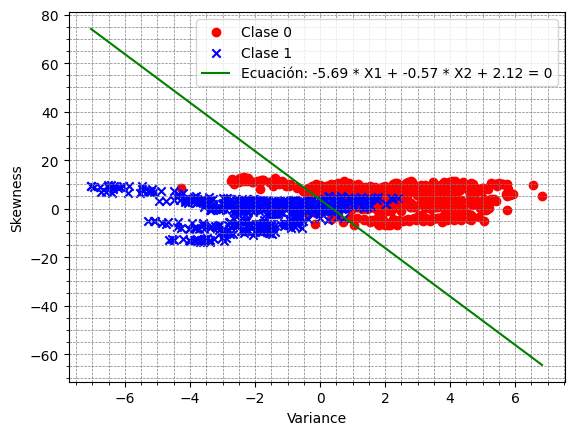

In [ ]:
# Grafica de separacion

# Creo el dataframe
grafica = pd.DataFrame(data=x_train, columns=['variance', 'skewness'])
grafica['class'] = y_train

# Divido el DataFrame en dos basado en la clase.
dfReal = grafica[grafica['class'] == 0]
dfFalso = grafica[grafica['class'] == 1]

# Graficar los datos
plt.scatter(dfReal['variance'], dfReal['skewness'], color='red', marker='o', label='Clase 0')
plt.scatter(dfFalso['variance'], dfFalso['skewness'], color='blue', marker='x', label='Clase 1')

# Superponer las ecuaciones lineales
resultado = resultEntrenamientos[0]  # Tomando el primer modelo entrenado
w1, w2, b = resultado['w1'], resultado['w2'], resultado['b']
x1Valor = np.linspace(min(grafica['variance']), max(grafica['variance']), 100)
x2Valor = -(w1 / w2) * x1Valor - (b / w2)
# Graficar la línea
plt.plot(x1Valor, x2Valor, label=f'Ecuación: {w1:.2f} * X1 + {w2:.2f} * X2 + {b:.2f} = 0', color='green')

# Activar la grilla
plt.minorticks_on()
plt.grid(True, which='both', linestyle='--', color='gray', linewidth=0.5)
plt.xlabel('Variance')
plt.ylabel('Skewness')
plt.legend()
plt.show()

In [ ]:
#Grafica de matriz de confusion

# Calcula la matriz de confusión
prediccion = ppn.predict(x_test)
cm_ppn_1 = confusion_matrix(y_test, prediccion)
print(cm_ppn_1)

[[130  17]
 [ 17 106]]


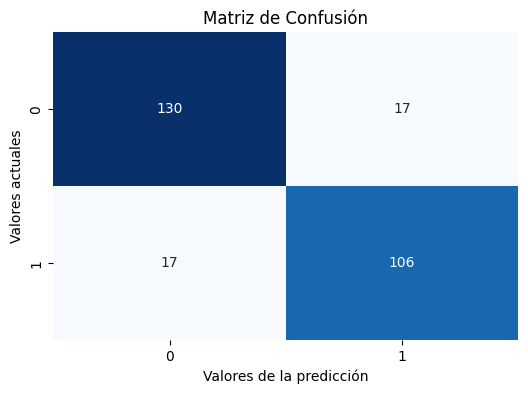

In [ ]:
# Graficar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(cm_ppn_1, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Valores de la predicción')
plt.ylabel('Valores actuales')
plt.title('Matriz de Confusión')
plt.show()

El modelo con estas metricas es bastante preciso frente a la matriz de confusion.

In [ ]:
class metricas_matriz_confusion(object):

    def __init__(self, cm):
        self.TP = cm[1][1]
        self.FP = cm[0][1]
        self.FN = cm[1][0]
        self.TN = cm[0][0]

        self.accuracy = (self.TP+self.TN)/(self.TP+self.FP+self.FN+self.TN)
        self.error_rate = (self.FP+self.FN)/(self.TP+self.FP+self.FN+self.TN)
        self.precision = (self.TP)/(self.TP+self.FP)
        self.recall = (self.TP)/(self.TP+self.FN)
        self.especificity = (self.TN)/(self.TN+self.FP)

In [ ]:
metrics_ppn_1 =metricas_matriz_confusion(cm_ppn_1)

In [ ]:
print("El valor de exactitud (accuracy) es: " + str(metrics_ppn_1.accuracy))
print("El valor de tasa de error (error_rate) es: " + str(metrics_ppn_1.error_rate))
print("El valor de precisión (precision) es: " + str(metrics_ppn_1.precision))
print("El valor de recall (sensibilidad / sensitivity / true positive rate) es: " + str(metrics_ppn_1.recall))
print("El valor de especificidad (especificity) es: " + str(metrics_ppn_1.especificity))

El valor de exactitud (accuracy) es: 0.8740740740740741
El valor de tasa de error (error_rate) es: 0.1259259259259259
El valor de precisión (precision) es: 0.8617886178861789
El valor de recall (sensibilidad / sensitivity / true positive rate) es: 0.8617886178861789
El valor de especificidad (especificity) es: 0.8843537414965986


# ADALINE

In [ ]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parámetros
    ------------
    |eta : float
      Tasa de aprendizaje (entre 0.0 y 1.0)
    |n_iter : int
      Número de iteraciones sobre el dataset.
    |random_state : int
      Semilla del generador de números aleatorios para la inicialización del bias y pesos aleatorios.


    Atributos
    -----------
    |w_ : Arreglo 1D
      Pesos antes del entrenamiento (Iniciales).
    |cost_  : list
      Valro de la función de costo de suma de cuadrados en cada época.


    """
    #FUNCIÓN PARA INICIALIZAR MI ADALINE
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Datos de entrenamiento para ajustar.

          Parameters
        ----------
        X : {Tipo matriz}, Dimensión = [n_muestras, n_características]
          Training vectors, donde n_muestras es el número de muestras y
          n_características es el número de características.
        y : Tipo vector fila, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)


        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):

            #Se calcula la NETA para todos los valores de entrada
            net_input = self.net_input(X)

            #Observe por favor que a continuación se llama a la función de activación
            #Pero en realidad no tiene efecto, se podría colocar directamente:
            #output = self.net_input(X)
            #Pero el propósito es dejar dispuesto el código para usar la función de activación en otros casos.
            output = self.activation(net_input)

            errors = (y - output)

            self.w_[1:] += self.eta * X.T.dot(errors)

            self.w_[0] += self.eta * errors.sum()

            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calcula el valor neto (Z)"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Función de activación lineal"""
        return X

    def predict(self, X):
        """Retonar el valor de clase perteneciente"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

In [ ]:
# Estandarizacion

X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(X_std, y, test_size= 0.2, random_state=0)

In [ ]:
# Entrenamiento ADALINE

resultEntrenamientos = []
iteraciones = [100, 150, 200]
valoresEta = [0.0001, 0.0002, 0.0004]
modelos = []
for n_iter in iteraciones:
  for eta in valoresEta:
    # Crear una nueva instancia del perceptrón con el valor de eta actual
    ada = AdalineGD(eta = eta, n_iter = n_iter)
    # Entrenamiento
    ada.fit(x_train_2, y_train_2)
    # Almacenar los últimos valores de convergencia
    valores = {'eta': eta, 'w1': ada.w_[-2], 'w2': ada.w_[-1], 'b': ada.w_[0], 'cost': ada.cost_}
    resultEntrenamientos.append(valores)
    modelos.append(ada)
# Imprimir los resultados
for resultado in resultEntrenamientos:
    print(f"Tasa de aprendizaje (eta): {resultado['eta']}")
    print(f"Últimos valores de convergencia - w1: {resultado['w1']}, w2: {resultado['w2']}, b: {resultado['b']}")
    print(f"Costos de la tasa: {resultado['cost']}")
    print()
ada = modelos[0]

Tasa de aprendizaje (eta): 0.0001
Últimos valores de convergencia - w1: -0.3314727607282722, w2: -0.1363506857087053, b: 0.4534632526266891
Costos de la tasa: [232.14538217714647, 192.8637294592746, 162.3174263873868, 138.53629640320386, 120.00031083557928, 105.53551323452011, 94.23426685025026, 85.39408531030494, 78.4706729046122, 73.04183948731651, 68.77974499670195, 65.42952990638936, 62.792845944577294, 60.715150556165796, 59.07589492329638, 57.780938697780215, 56.756679962493045, 55.945507745085955, 55.302275335350174, 54.79156230942127, 54.3855465654348, 54.06234865470809, 53.804742168588234, 53.599148140394284, 53.434850044445255, 53.30338031906064, 53.1980404011059, 53.11352479653097, 53.045626306925406, 52.99100463302466, 52.9470045251076, 52.9115127106111, 52.882845203477494, 52.85965844352819, 52.840879147520425, 52.825648869023105, 52.81328013325609, 52.8032216907485, 52.795030962755746, 52.78835216486309, 52.782898918693135, 52.778440414981475, 52.77479038990766, 52.771798

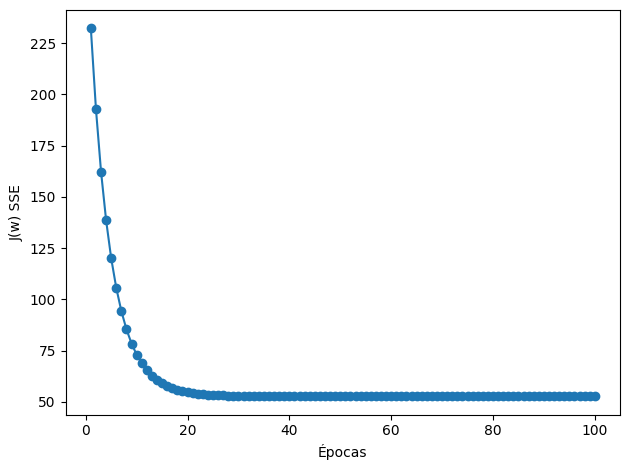

In [ ]:
# Grafico de los costos

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('J(w) SSE')
plt.tight_layout()

In [ ]:
# w de los hiperparametros
print(ada.w_)

[ 0.45346325 -0.33147276 -0.13635069]


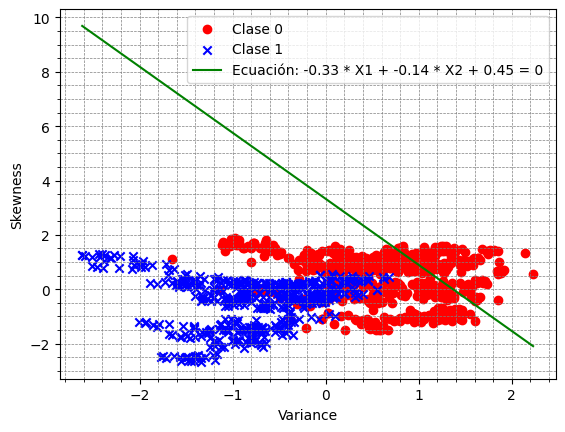

In [ ]:
# Grafica de separacion

# Creo el dataframe
grafica = pd.DataFrame(data=x_train_2, columns=['variance', 'skewness'])
grafica['class'] = y_train_2

# Divido el DataFrame en dos basado en la clase.
dfReal = grafica[grafica['class'] == 0]
dfFalso = grafica[grafica['class'] == 1]

# Graficar los datos
plt.scatter(dfReal['variance'], dfReal['skewness'], color='red', marker='o', label='Clase 0')
plt.scatter(dfFalso['variance'], dfFalso['skewness'], color='blue', marker='x', label='Clase 1')

# Superponer las ecuaciones lineales
resultado = resultEntrenamientos[0]  # Tomando el primer modelo entrenado
w1, w2, b = ada.w_[1], ada.w_[2], ada.w_[0]
x1Valor = np.linspace(min(grafica['variance']), max(grafica['variance']), 100)
x2Valor = -(w1 / w2) * x1Valor - (b / w2)
# Graficar la línea
plt.plot(x1Valor, x2Valor, label=f'Ecuación: {w1:.2f} * X1 + {w2:.2f} * X2 + {b:.2f} = 0', color='green')

# Activar la grilla
plt.minorticks_on()
plt.grid(True, which='both', linestyle='--', color='gray', linewidth=0.5)
plt.xlabel('Variance')
plt.ylabel('Skewness')
plt.legend()
plt.show()

In [ ]:
# Funcion Separadora

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

<ipython-input-218-674a1777f0d6>:23: UserWarning:

You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.



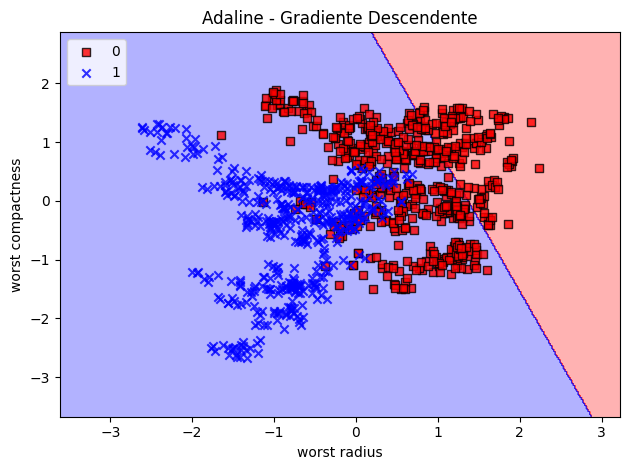

In [ ]:
# Grafica Separadora gradiente

plot_decision_regions(x_train_2, y_train_2, classifier=ada)
plt.title('Adaline - Gradiente Descendente')
plt.xlabel('worst radius')
plt.ylabel('worst compactness')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
#Grafica de matriz de confusion

# Calcula la matriz de confusión
prediccion = ada.predict(x_test_2)
cm_ada_1 = confusion_matrix(y_test_2, prediccion)
print(cm_ada_1)

[[  0   0   0]
 [ 42   0 105]
 [  0   0 123]]


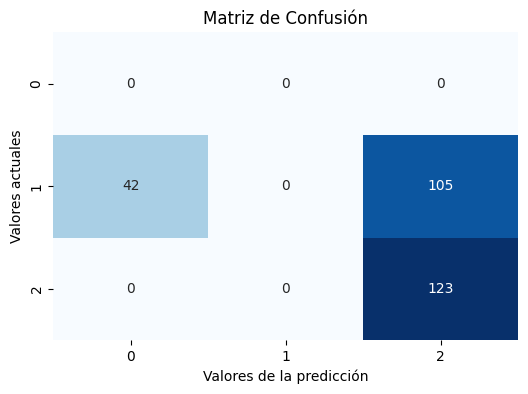

In [ ]:
# Graficar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(cm_ada_1, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Valores de la predicción')
plt.ylabel('Valores actuales')
plt.title('Matriz de Confusión')
plt.show()

El modelo con estas metricas es bastante preciso frente a la matriz de confusion.

In [ ]:
metrics_ada_1 =metricas_matriz_confusion(cm_ada_1)

<ipython-input-209-b239dac48dff>:11: RuntimeWarning:

invalid value encountered in scalar divide

<ipython-input-209-b239dac48dff>:13: RuntimeWarning:

invalid value encountered in scalar divide



In [ ]:
print("El valor de exactitud (accuracy) es: " + str(metrics_ada_1.accuracy))
print("El valor de tasa de error (error_rate) es: " + str(metrics_ada_1.error_rate))
print("El valor de precisión (precision) es: " + str(metrics_ada_1.precision))
print("El valor de recall (sensibilidad / sensitivity / true positive rate) es: " + str(metrics_ada_1.recall))
print("El valor de especificidad (especificity) es: " + str(metrics_ada_1.especificity))

El valor de exactitud (accuracy) es: 0.0
El valor de tasa de error (error_rate) es: 1.0
El valor de precisión (precision) es: nan
El valor de recall (sensibilidad / sensitivity / true positive rate) es: 0.0
El valor de especificidad (especificity) es: nan


# Analisis con 3 variables

In [ ]:
# Seleccionar dos clases con tres características que permitan la mejor separabilidad
# Seleccion de la base de datos y grafica de la distribucion de los datos
class_0_indices = data[data['class'] == 0].index
class_1_indices = data[data['class'] == 1].index

class_0_data = data.loc[class_0_indices, :]
class_1_data = data.loc[class_1_indices, :]

# Tomar dos clases con tres características
class_0_1_data = pd.concat([class_0_data, class_1_data])
nombres = ['variance','skewness','curtosis']
# Seleccionar tres características que permitan la mejor separabilidad
best_features = [nombres[0],nombres[1], nombres[2]]
titulos = [nombres[0],nombres[1],nombres[2]]

# Proyección de datos en tres características seleccionadas
X = class_0_1_data[best_features].values
y = class_0_1_data['class'].values

# Crear figura
fig = go.Figure()

# Añadir los puntos de datos
for label in np.unique(y):
    fig.add_trace(go.Scatter3d(
        x=X[y == label, 0],
        y=X[y == label, 1],
        z=X[y == label, 2],
        mode='markers',
        marker=dict(
            size=5,
            color=label,
            colorscale='Viridis',
            opacity=0.8
        ),
        name=f'Class {int(label)} (Billetes )'
    ))

# Establecer las etiquetas de los ejes y el título
fig.update_layout(
    scene=dict(
        xaxis=dict(title=titulos[0]),
        yaxis=dict(title=titulos[1]),
        zaxis=dict(title=titulos[2])
    ),
    title='Gráfico 3D para las clases billete falso y verdadero'
)

# Mostrar la figura interactiva
fig.show()

In [ ]:
#visualizacion de la base de datos
print(X)

import matplotlib.pyplot as plt
import numpy as np

y = class_0_1_data['class'].values
y = np.where(y==0,0,1)

print(y)



[[  3.6216    8.6661   -2.8073 ]
 [  4.5459    8.1674   -2.4586 ]
 [  3.866    -2.6383    1.9242 ]
 ...
 [ -3.7503  -13.4586   17.5932 ]
 [ -3.5637   -8.3827   12.393  ]
 [ -2.5419   -0.65804   2.6842 ]]
[0 0 0 ... 1 1 1]


In [ ]:
# separacion de datos de entrenamiento y test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state=0)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1097, 3)
(275, 3)
(1097,)
(275,)


# Perceptron
Entrenamiento con tres caracteristicas con el modelo elegido

In [ ]:
ppn_1 =Perceptron(eta=0.3, n_iter=20, Af='step_function', Rw=0)

In [ ]:
ppn_1.fit(x_train,y_train)

In [ ]:
print(ppn_1.w_historical)

[array([ 0.01624345, -0.00611756, -0.00528172, -0.01072969]), array([ 7.81624345, -8.29176056, -4.79966362, -6.31898809]), array([ 10.81624345, -10.35829256,  -6.06548362,  -8.71199209]), array([ 14.11624345, -12.40860356,  -6.88430362,  -8.92402609]), array([ 15.01624345, -14.94279056,  -7.77446362,  -9.91321609]), array([ 15.91624345, -16.08813956,  -8.60627362, -10.44973609]), array([ 19.21624345, -16.81006556,  -8.35859362,  -9.74641609]), array([ 20.71624345, -17.69698556,  -9.51260362, -11.17687609]), array([ 21.91624345, -18.43080056,  -9.42506362, -12.04195609]), array([ 21.31624345, -18.79850156, -12.46499362, -11.96674609]), array([ 23.11624345, -20.23634156,  -9.86261362, -13.15948609]), array([ 23.11624345, -19.92808256, -11.43560362, -13.94377609]), array([ 22.21624345, -20.42223356, -11.86514362, -14.54656609]), array([ 23.41624345, -21.74549456, -11.71238362, -14.15215609]), array([ 24.01624345, -22.86001556, -10.81592362, -14.44336609]), array([ 24.01624345, -23.5684565

In [ ]:
print(ppn_1.errors_)

[62, 34, 31, 25, 23, 27, 29, 24, 16, 24, 16, 11, 22, 18, 18, 15, 22, 17, 15, 16]


# Visualizacion de los errores

Text(0, 0.5, 'Número de actualizaciones')

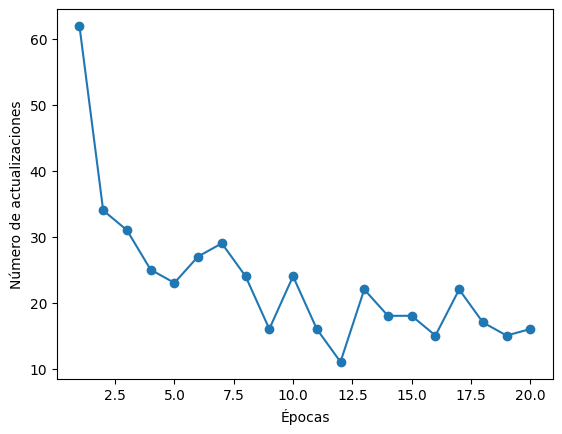

In [ ]:
plt.plot(range(1, len(ppn_1.errors_) + 1), ppn_1.errors_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Número de actualizaciones')

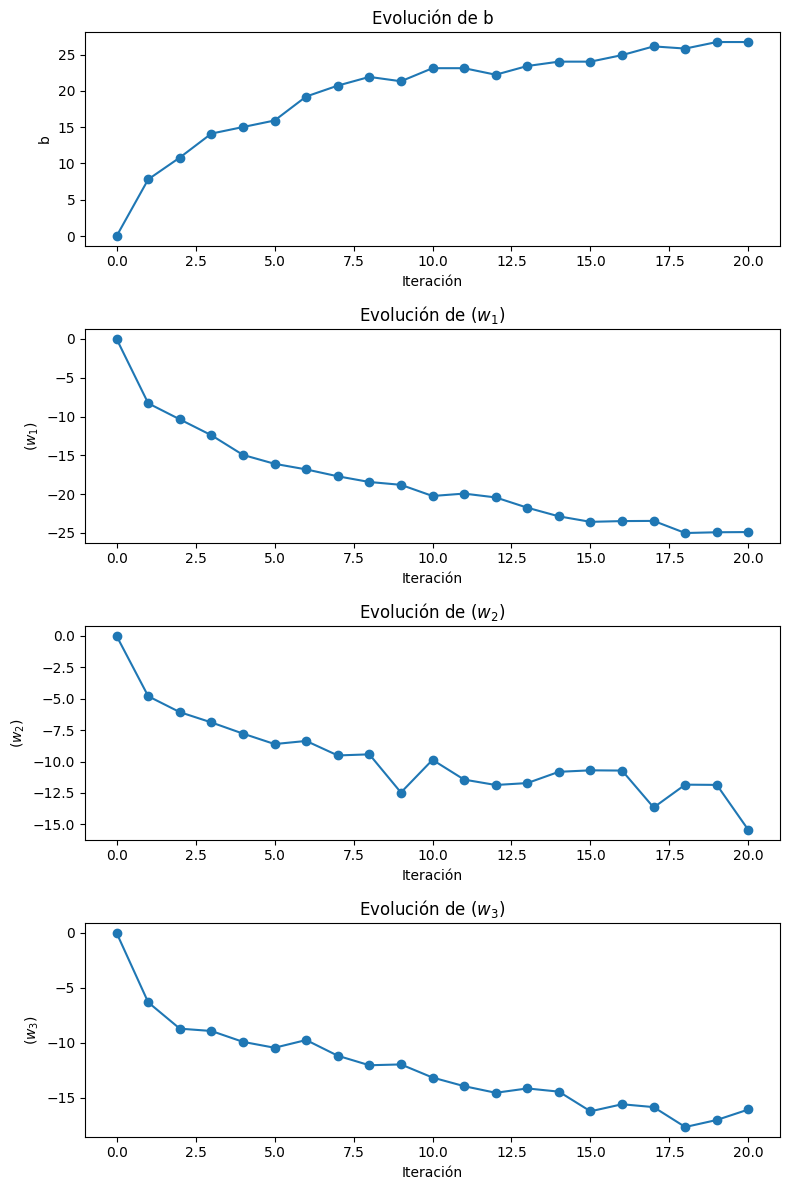

In [ ]:
# Lista de etiquetas para los gráficos
labels = ['b', '($w_1$)', '($w_2$)', '($w_3$)']

# Crear tres subgráficos
fig, axs = plt.subplots(len(labels), 1, figsize=(8, 12))

# Iterar sobre cada etiqueta y crear un gráfico correspondiente
for i, label in enumerate(labels):
    # Extraer la serie temporal para la etiqueta actual
    series = [weights[i] for weights in ppn_1.w_historical]

    # Graficar la serie temporal
    axs[i].plot(range(len(ppn_1.w_historical)), series, marker='o')
    axs[i].set_title(f'Evolución de {label}')
    axs[i].set_xlabel('Iteración')
    axs[i].set_ylabel(label)



# Ajustar espaciado entre subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

# Historico

In [ ]:
print(ppn_1.w_historical[-1])

[ 26.71624345 -24.88504856 -15.45050362 -16.06726609]


In [ ]:
# Seleccionar dos clases con tres características que permitan la mejor separabilidad
class_0_indices = data[data['class'] == 0].index
class_1_indices = data[data['class'] == 1].index

class_0_data = data.loc[class_0_indices, :]
class_1_data = data.loc[class_1_indices, :]

# Tomar dos clases con tres características
class_0_1_data = pd.concat([class_0_data, class_1_data])
nombres = ['variance', 'skewness','curtosis']
# Seleccionar tres características que permitan la mejor separabilidad
best_features = [nombres[0],nombres[1], nombres[2]]
titulos = [nombres[0],nombres[1],nombres[2]]

# Proyección de datos en tres características seleccionadas
X = class_0_1_data[best_features].values
y = class_0_1_data['class'].values

b=ppn_1.w_historical[-1][0]
w1=ppn_1.w_historical[-1][1]
w2=ppn_1.w_historical[-1][2]
w3=ppn_1.w_historical[-1][3]

# Crear puntos para el plano
x_plane = np.linspace(x_train[:, 0].min(), x_train[:, 0].max(), 10)
y_plane = np.linspace(x_train[:, 1].min(), x_train[:, 1].max(), 10)
x_plane, y_plane = np.meshgrid(x_plane, y_plane)
z_plane = (-w1 * x_plane - w2 * y_plane - b) / w3
# Crear figura
fig = go.Figure()

# Añadir los puntos de datos
for label in np.unique(y_train):
    fig.add_trace(go.Scatter3d(
        x=X[y == label, 0],
        y=X[y == label, 1],
        z=X[y == label, 2],
        mode='markers',
        marker=dict(
            size=5,
            color=label,
            colorscale='Viridis',
            opacity=0.8
        ),
        name=f'Class {int(label)} (Billete )'
    ))

for label in np.unique(y_test):
    fig.add_trace(go.Scatter3d(
        x=x_test[y_test == label, 0],
        y=x_test[y_test == label, 1],
        z=x_test[y_test == label, 2],
        mode='markers',
        marker=dict(
            size=5,
            color='yellow' if label == 0 else 'black',
            opacity=0.8
        ),
        name=f'Class {int(label)} (billetes ) TEST'
    ))

fig.add_trace(go.Surface(
    x=x_plane,
    y=y_plane,
    z=z_plane,
    opacity=0.5,
    colorscale='Viridis',
    showscale=False
))
# Establecer las etiquetas de los ejes y el título
fig.update_layout(
    scene=dict(
        xaxis=dict(title=titulos[0]),
        yaxis=dict(title=titulos[1]),
        zaxis=dict(title=titulos[2])
    ),
    title='Gráfico 3D para las clases billete falso y verdadero'
)

# Mostrar la figura interactiva
fig.show()

# Grafica de la primer iteraccion

In [ ]:
# Seleccionar dos clases con tres características que permitan la mejor separabilidad
class_0_indices = data[data['class'] == 0].index
class_1_indices = data[data['class'] == 1].index

class_0_data = data.loc[class_0_indices, :]
class_1_data = data.loc[class_1_indices, :]

# Tomar dos clases con tres características
class_0_1_data = pd.concat([class_0_data, class_1_data])
nombres = ['variance', 'skewness','curtosis']
# Seleccionar tres características que permitan la mejor separabilidad
best_features = [nombres[0],nombres[1], nombres[2]]
titulos = [nombres[0],nombres[1],nombres[2]]

# Proyección de datos en tres características seleccionadas
X = class_0_1_data[best_features].values
y = class_0_1_data['class'].values

b=ppn_1.w_historical[0][0]
w1=ppn_1.w_historical[0][1]
w2=ppn_1.w_historical[0][2]
w3=ppn_1.w_historical[0][3]

# Crear puntos para el plano
x_plane = np.linspace(x_train[:, 0].min(), x_train[:, 0].max(), 10)
y_plane = np.linspace(x_train[:, 1].min(), x_train[:, 1].max(), 10)
x_plane, y_plane = np.meshgrid(x_plane, y_plane)
z_plane = (-w1 * x_plane - w2 * y_plane - b) / w3
# Crear figura
fig = go.Figure()

# Añadir los puntos de datos
for label in np.unique(y_train):
    fig.add_trace(go.Scatter3d(
        x=X[y == label, 0],
        y=X[y == label, 1],
        z=X[y == label, 2],
        mode='markers',
        marker=dict(
            size=5,
            color=label,
            colorscale='Viridis',
            opacity=0.8
        ),
        name=f'Class {int(label)} (Billete )'
    ))

for label in np.unique(y_test):
    fig.add_trace(go.Scatter3d(
        x=x_test[y_test == label, 0],
        y=x_test[y_test == label, 1],
        z=x_test[y_test == label, 2],
        mode='markers',
        marker=dict(
            size=5,
            color='yellow' if label == 0 else 'black',
            opacity=0.8
        ),
        name=f'Class {int(label)} (billetes ) TEST'
    ))

fig.add_trace(go.Surface(
    x=x_plane,
    y=y_plane,
    z=z_plane,
    opacity=0.5,
    colorscale='Viridis',
    showscale=False
))
# Establecer las etiquetas de los ejes y el título
fig.update_layout(
    scene=dict(
        xaxis=dict(title=titulos[0]),
        yaxis=dict(title=titulos[1]),
        zaxis=dict(title=titulos[2])
    ),
    title='Gráfico 3D para las clases billete falso y verdadero'
)

# Mostrar la figura interactiva
fig.show()

Prediccion

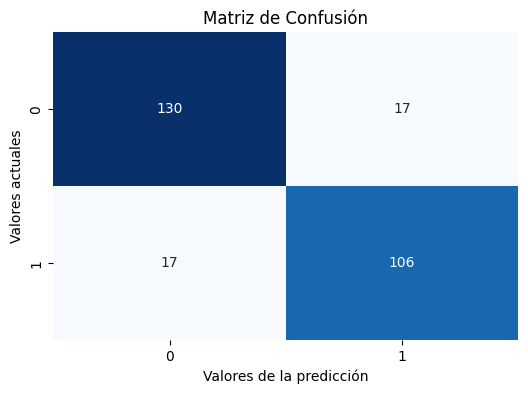

In [ ]:
# Graficar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(cm_ppn_1, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Valores de la predicción')
plt.ylabel('Valores actuales')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
y_predictions_ppn_1 = ppn_1.predict(x_test)

print(y_predictions_ppn_1)
print(y_test)

[1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 1 1 1 0 0
 1 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0
 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1 0 1 0 1 1 1 0
 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0
 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0
 1 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1
 1 0 0 0 1 0 0 1 1 0 1 1 0 1 1 1]
[1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 1 1 1 0 0
 1 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0
 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0
 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0
 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0
 1 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0

Matriz de confunsion

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calcula la matriz de confusión
cm_ppn_1 = confusion_matrix(y_test, y_predictions_ppn_1)

print(cm_ppn_1)

[[155   2]
 [  1 117]]


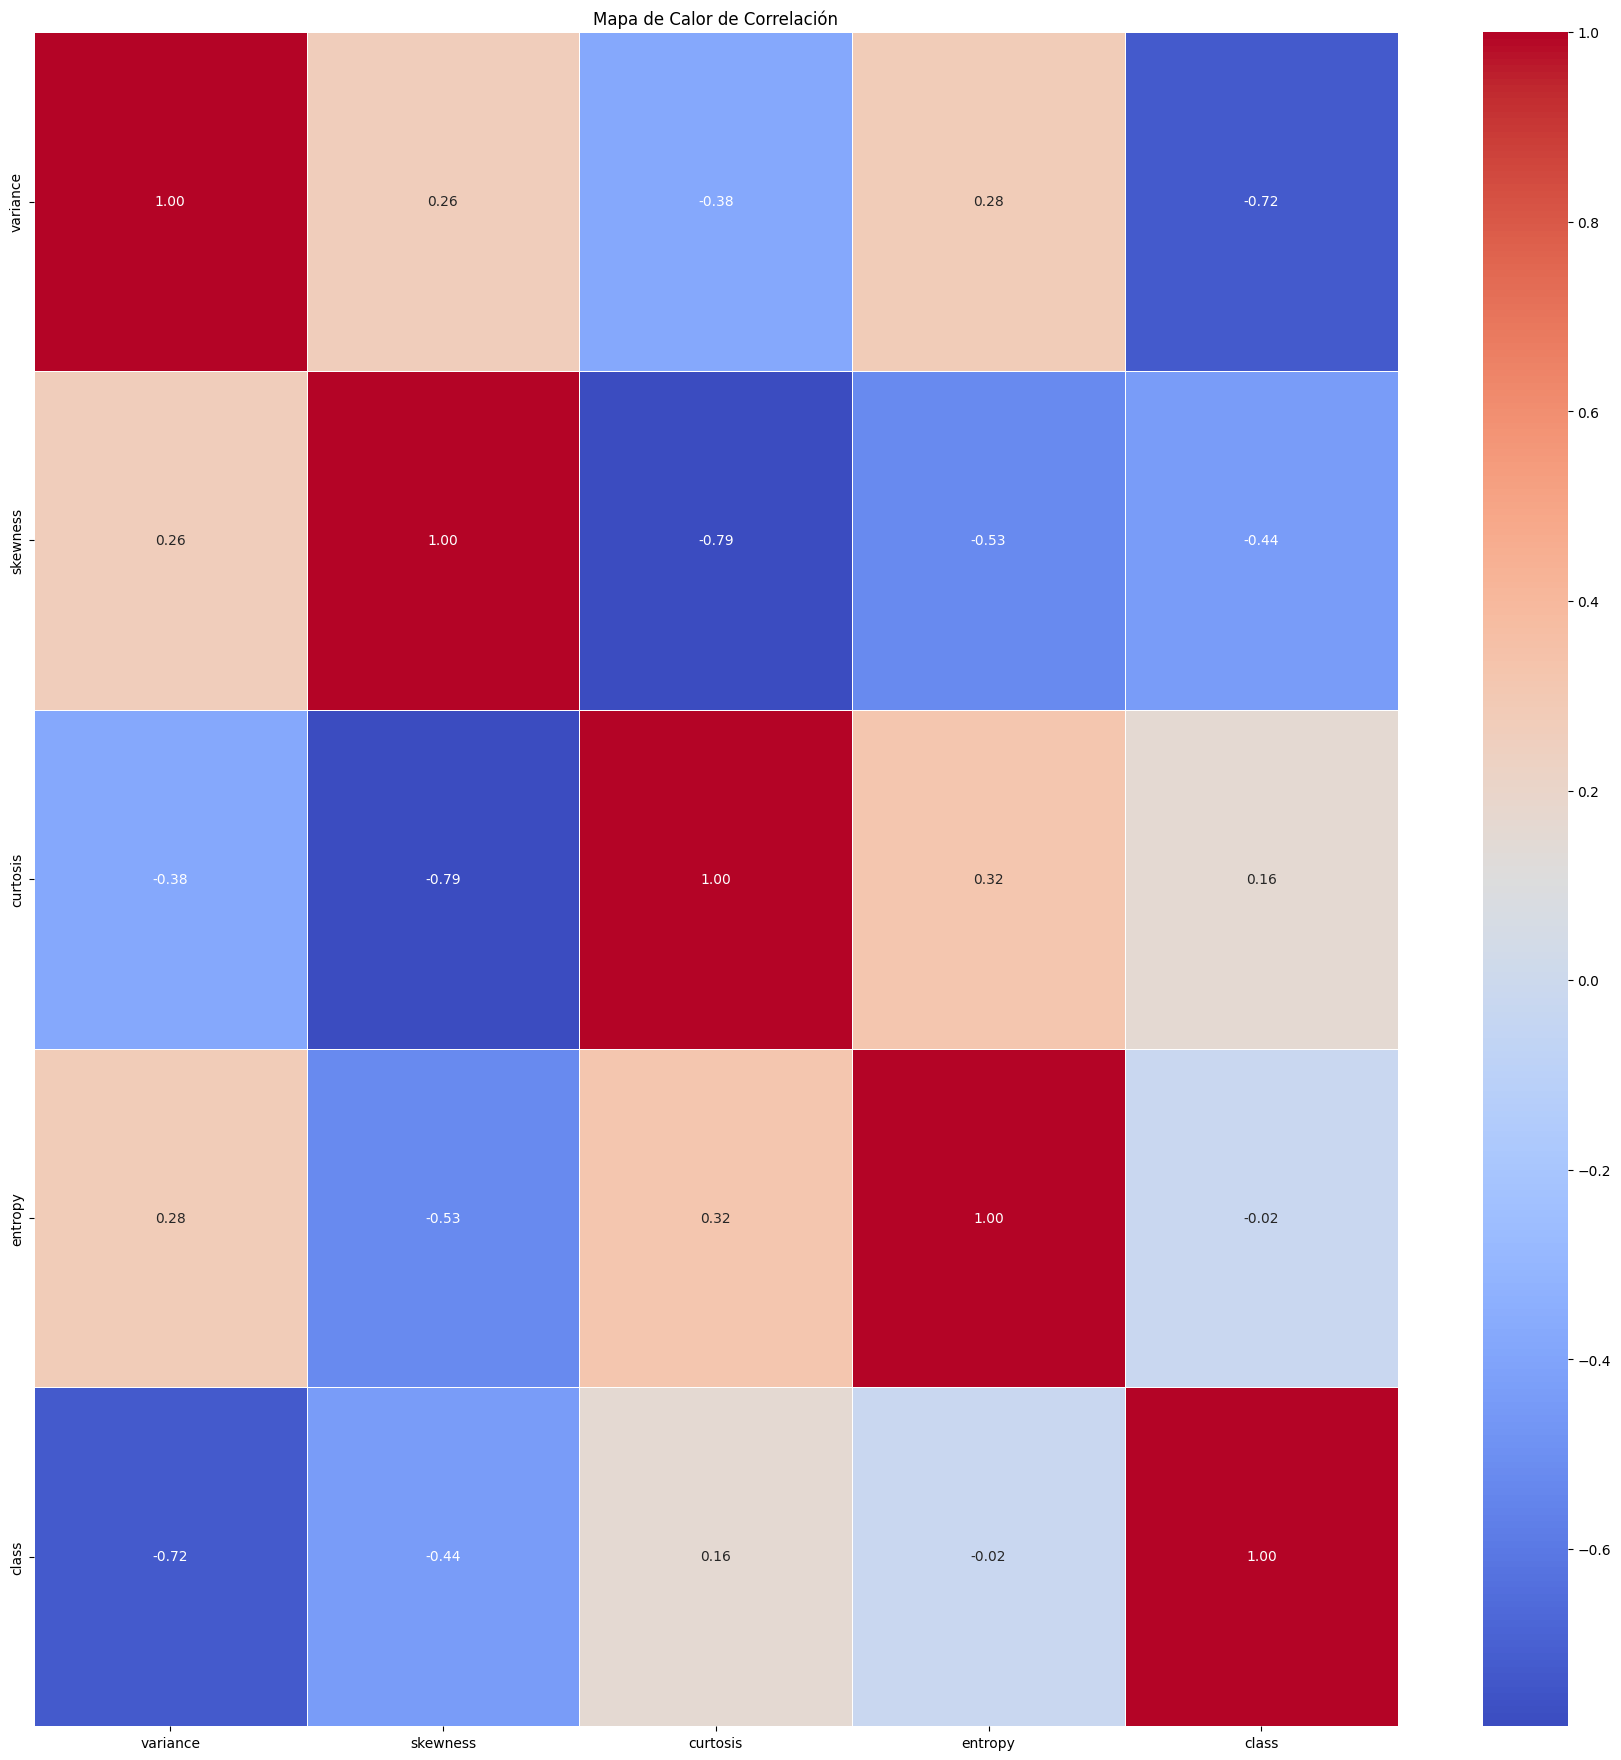

In [ ]:
# Grafica De Calor - Corelacion

# Calcular la matriz de correlación
matrizCorrelacion = data.corr()

# Mapa de calor
plt.figure(figsize = (22, 22))
sns.heatmap(matrizCorrelacion, annot = True, cmap = "coolwarm", fmt = ".2f", linewidths = 0.5)
plt.title("Mapa de Calor de Correlación")
plt.show()

In [ ]:
metrics_ppn_1 =metricas_matriz_confusion(cm_ppn_1)

In [ ]:
print("El valor de exactitud (accuracy) es: " + str(metrics_ppn_1.accuracy))
print("El valor de tasa de error (error_rate) es: " + str(metrics_ppn_1.error_rate))
print("El valor de precisión (precision) es: " + str(metrics_ppn_1.precision))
print("El valor de recall (sensibilidad / sensitivity / true positive rate) es: " + str(metrics_ppn_1.recall))
print("El valor de especificidad (especificity) es: " + str(metrics_ppn_1.especificity))

El valor de exactitud (accuracy) es: 0.9890909090909091
El valor de tasa de error (error_rate) es: 0.01090909090909091
El valor de precisión (precision) es: 0.9831932773109243
El valor de recall (sensibilidad / sensitivity / true positive rate) es: 0.9915254237288136
El valor de especificidad (especificity) es: 0.9872611464968153


# Con ADALINE

In [ ]:
# estandarizacion
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()
X_std[:, 2] = (X[:, 2] - X[:, 2].mean()) / X[:, 2].std()

print(X_std)

[[ 1.12180565  1.14945512 -0.97597007]
 [ 1.44706568  1.06445293 -0.89503626]
 [ 1.20780971 -0.77735215  0.12221838]
 ...
 [-1.47235682 -2.62164576  3.75901744]
 [-1.40669251 -1.75647104  2.552043  ]
 [-1.04712236 -0.43982168  0.29861555]]


In [ ]:
x_train_2, x_test_2, y_train_2, y_test_2= train_test_split(X_std, y, test_size= 0.2, random_state=0)

# entrenamiento con ADALINE

In [ ]:
ada_1 = AdalineGD(n_iter=250, eta=0.0001)

In [ ]:
ada_1.fit(x_train_2, y_train_2)

In [ ]:
print(ada_1.w_)

[ 0.44188648 -0.40812376 -0.45644536 -0.43773121]


In [ ]:
b=ada_1.w_[0]
w1=ada_1.w_[1]
w2=ada_1.w_[2]
w3=ada_1.w_[3]

print(b)
print(w1)
print(w2)
print(w3)

0.44188648360068555
-0.40812375701421066
-0.45644536230982485
-0.43773120728220494


# Visualizacion de las variables

In [ ]:
# Crear puntos para el plano
x_plane = np.linspace(x_train_2[:, 0].min(), x_train_2[:, 0].max(), 10)
y_plane = np.linspace(x_train_2[:, 1].min(), x_train_2[:, 1].max(), 10)
x_plane, y_plane = np.meshgrid(x_plane, y_plane)

nombres = ['variance', 'skewness','curtosis']
# Seleccionar tres características que permitan la mejor separabilidad
best_features_titles = [nombres[0],nombres[1], nombres[2]]
# Crear la figura tridimensional interactiva
fig = go.Figure()

# Añadir los puntos de entrenamiento
for label in np.unique(y_train_2):
    fig.add_trace(go.Scatter3d(
        x=x_train_2[y_train_2 == label, 0],
        y=x_train_2[y_train_2 == label, 1],
        z=x_train_2[y_train_2 == label, 2],
        mode='markers',
        marker=dict(
            size=5,
            color=label,
            colorscale='Viridis',
            opacity=0.8
        ),
        name=f'Class {int(label)} (Billetes )'
    ))

# Añadir los puntos de prueba
for label in np.unique(y_test_2):
    fig.add_trace(go.Scatter3d(
        x=x_test_2[y_test_2 == label, 0],
        y=x_test_2[y_test_2 == label, 1],
        z=x_test_2[y_test_2 == label, 2],
        mode='markers',
        marker=dict(
            size=5,
            color='yellow' if label == 0 else 'black',
            opacity=0.8
        ),
        name=f'Class {int(label)} (Billetes) TEST'
    ))

# Añadir el plano
# Aquí debes definir adecuadamente los coeficientes del plano (w1, w2, w3, b)
z_plane = (-w1 * x_plane - w2 * y_plane - b) / w3
fig.add_trace(go.Surface(
    x=x_plane,
    y=y_plane,
    z=z_plane,
    opacity=0.5,
    colorscale='Viridis',
    showscale=False
))

# Establecer las etiquetas de los ejes y el título
fig.update_layout(
    scene=dict(
        xaxis=dict(title=best_features_titles[0]),
        yaxis=dict(title=best_features_titles[1]),
        zaxis=dict(title=best_features_titles[2])
    ),
    title='Gráfico 3D para las clases Verdadero y Falso'
)

# Mostrar la figura interactiva
fig.show()

In [ ]:
print(ada_1.cost_)

[235.2832099570936, 194.18900453362102, 163.04307980742666, 139.0882162260723, 120.41275073992688, 105.67058895080862, 93.89894496540549, 84.3985537361853, 76.65406822101522, 70.28049875329853, 64.98667901503777, 60.54997893820282, 56.79853407960566, 53.59856410436001, 50.845185858133995, 48.45566209635361, 46.36437392183645, 44.51903175103148, 42.8777893455203, 41.40702544114206, 40.079625160216125, 38.87363980826225, 37.771235975739195, 36.75786771246344, 35.821621939119694, 34.95269920076116, 34.14300068265676, 33.385798999414746, 32.675475251148924, 32.00730864493629, 31.377307909218636, 30.7820760005655, 30.2187013745294, 29.684670481843085, 29.177797245055885, 28.696166134674968, 28.23808614814591, 27.802053538169375, 27.386721568801754, 26.99087592182475, 26.61341465023657, 26.253331794762353, 25.909703954322097, 25.581679241385885, 25.268468165187542, 24.969336075499534, 24.683596871580058, 24.410607738561545, 24.149764719808097, 23.900498970901914, 23.66227357074178, 23.434580

# Grafico de los errores

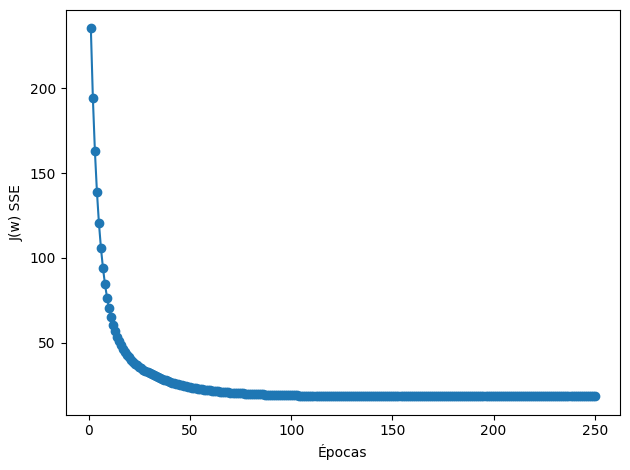

In [ ]:
plt.plot(range(1, len(ada_1.cost_) + 1), ada_1.cost_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('J(w) SSE')

plt.tight_layout()

In [ ]:
y_predictions_ada_1 = ada_1.predict(x_test_2)

In [ ]:
# Calcula la matriz de confusión
cm_ada_1 = confusion_matrix(y_test_2, y_predictions_ada_1)

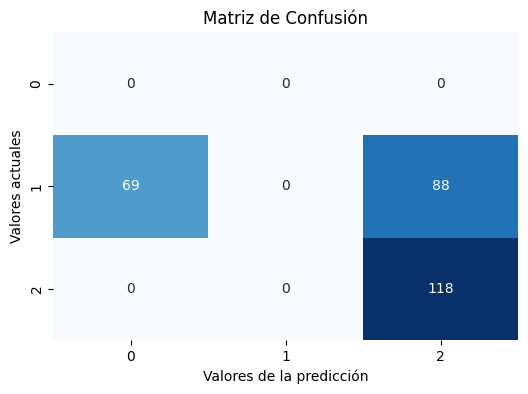

In [ ]:
# Graficar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(cm_ada_1, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Valores de la predicción')
plt.ylabel('Valores actuales')
plt.title('Matriz de Confusión')
plt.show()

Aunque se ve un error en la grafica, se ve bien.

In [ ]:
metrics_ada_1 =metricas_matriz_confusion(cm_ada_1)

print("El valor de exactitud (accuracy) es: " + str(metrics_ada_1.accuracy))
print("El valor de tasa de error (error_rate) es: " + str(metrics_ada_1.error_rate))
print("El valor de precisión (precision) es: " + str(metrics_ada_1.precision))
print("El valor de recall (sensibilidad / sensitivity / true positive rate) es: " + str(metrics_ada_1.recall))
print("El valor de especificidad (especificity) es: " + str(metrics_ada_1.especificity))

El valor de exactitud (accuracy) es: 0.0
El valor de tasa de error (error_rate) es: 1.0
El valor de precisión (precision) es: nan
El valor de recall (sensibilidad / sensitivity / true positive rate) es: 0.0
El valor de especificidad (especificity) es: nan


<ipython-input-209-b239dac48dff>:11: RuntimeWarning:

invalid value encountered in scalar divide

<ipython-input-209-b239dac48dff>:13: RuntimeWarning:

invalid value encountered in scalar divide



# NOTA: ELegimo el primer modelo para realizar los procedimientos, dandonos cuentas que si no elegimos un buen modelo no obtendremos buenos resultados, puesto que al vber la diferencia entre ADALINE Y PERCEPTRON, claramente es mejor perceptro.